# Fundamentals of Data Analysis

## Project 2020

In this project perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

For enhancement, compare simple linear regression to
other types of regression on this data set

### Project Plan

1. Upload the dataset.
2. Import required libaries for the notebook
3. Intial look at the datset, pandas.describe(), distribution of data, np.random.normal
4. scatterplot of the data using seaborn
5. Explore https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 
6. Understand maybe 5 types of regression on this dataset.
7. Research types of regression that might be suitable - idea of curve/line post initial look at dataset.
8. Regression Vids Tutorials for better understanding:
 - https://www.youtube.com/user/zedstatistics
 - https://en.wikipedia.org/wiki/Regression_analysis
 - https://www.statisticshowto.com/probability-and-statistics/regression-analysis/
 - https://www.sciencedirect.com/topics/medicine-and-dentistry/regression-analysis
9. Plots to describe each regression type
10. subplots for comparison
11. tables for comparison


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#style of plot to be used
plt.style.use("ggplot")

#plot sizes
plt.rcParams['figure.figsize'] = [24, 20]

In [3]:
#reading in the dataset
df = pd.read_csv('powerproduction.txt')
df.tail(20)
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
#data types
df.dtypes

speed    float64
power    float64
dtype: object

In [5]:
#summary statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


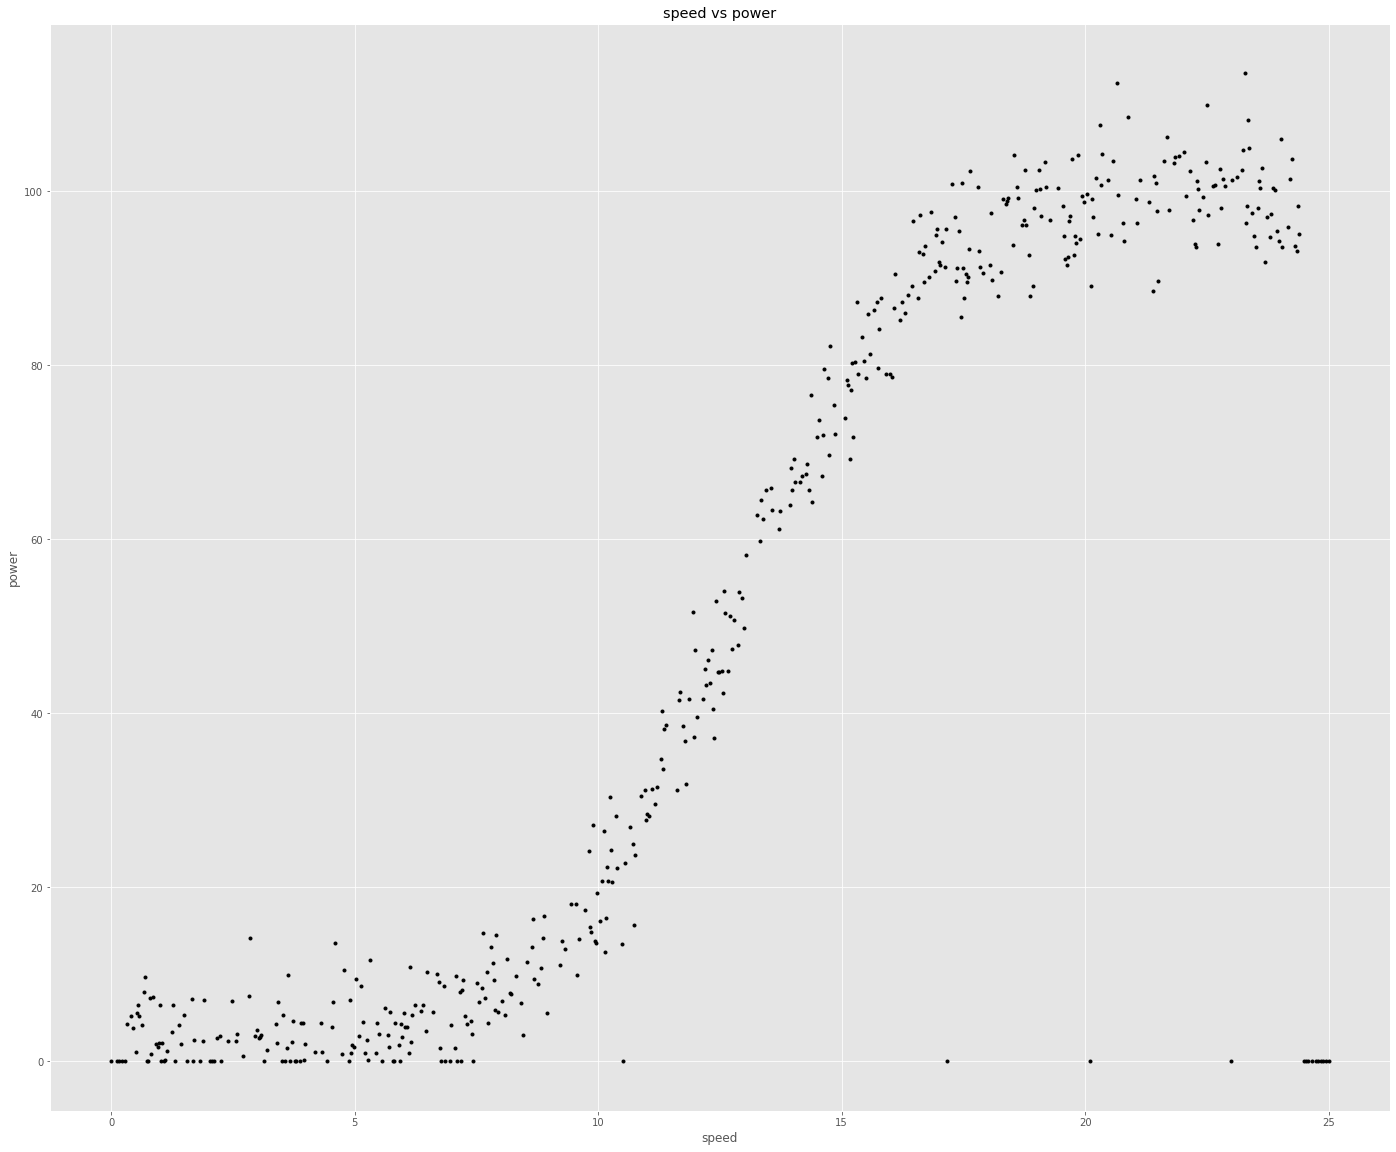

In [6]:
#plotting the dataset
plt.plot(df['speed'],df['power'],'.',color='black')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}');

Looking at the relationship between speed and power we can see that when the speed gets above 10, the power begins to increase sharply but flattens out again once the speed reaches approx 17.5. 

There are also a number of zero values for power when speed is greater than zero. We may view theswe as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison.

The relationship between speed and power shows a curve or *s shape* pattern. This suggests we should investigate different degrees values when fitting our best fit line.

### Simple Linear Regression with Numpy Polyfit all values

$ y = mx + c $

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

Using the numpy polyfit function we can identify the coefficents or the $m$ and the $c$. For a staright line we will pass *1* as the degree to create a staright line. Later we will look at applying different degrees to prehaps get a better overall fit.

A simple linear regression estimates the relationship between the values. In the dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is *dependent* on Speed *(independent)*. 



In [7]:

#power and speed values as variable
speed = df['speed']
power = df['power']

#polyfit function, identifiying coeffieients
coeffs= np.polyfit(speed,power,1)


#### Function for prediction

Using the coefficients from the polyfit function, we will create a simple predict function.

In [8]:
def predict_m1(x):
    pred = coeffs[0] *+ x + coeffs[1]
    return pred

***

### Model Accuaracy Indicactors

#### Coefficient of determination

ref https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

The R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is the percentage of the response variable variation that is explained by a linear model. In general the higher the value the better the model fits the data.

The R-squared values range from 0 to 1 and are repesneted by percentages. It really only works  with one explanatory variable.

In [9]:
#calculating R-squared value for the dataset
rsq = np.corrcoef(power,speed)[0][1]**2

#### Root Mean Squared Error

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

$MSE=\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data. It gives an absolute number on how much the predicted results deviate from the actual number. Not many insights can be interpreted from one single result but it gives a real number to compare against other model results in helping to select the best regression model.

$RMSE=\sqrt{MSE}$

RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

The lower the RMSE value means an indication of a better model fit.

In [10]:
rmse = np.sqrt((np.sum((predict_m1(speed) - power)**2))/len(power))

### Cost Function

ref https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

$$ \sum_i (y_i - mx_i - c)^2 $$

The cost function when applying the coffeficents identified by the polyfit function is the mean of the squared differences between predicted y and actual y (i.e. the residuals). The lower the cost means more accuracy in the model.

In [11]:
#cost ref https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
cost1 = lambda m,c: np.sum([(power[i] - coeffs[0] * speed[i] - coeffs[1])**2 for i in range(speed.size)])
c1 = cost1(coeffs[0],coeffs[1])

### Fitting the model

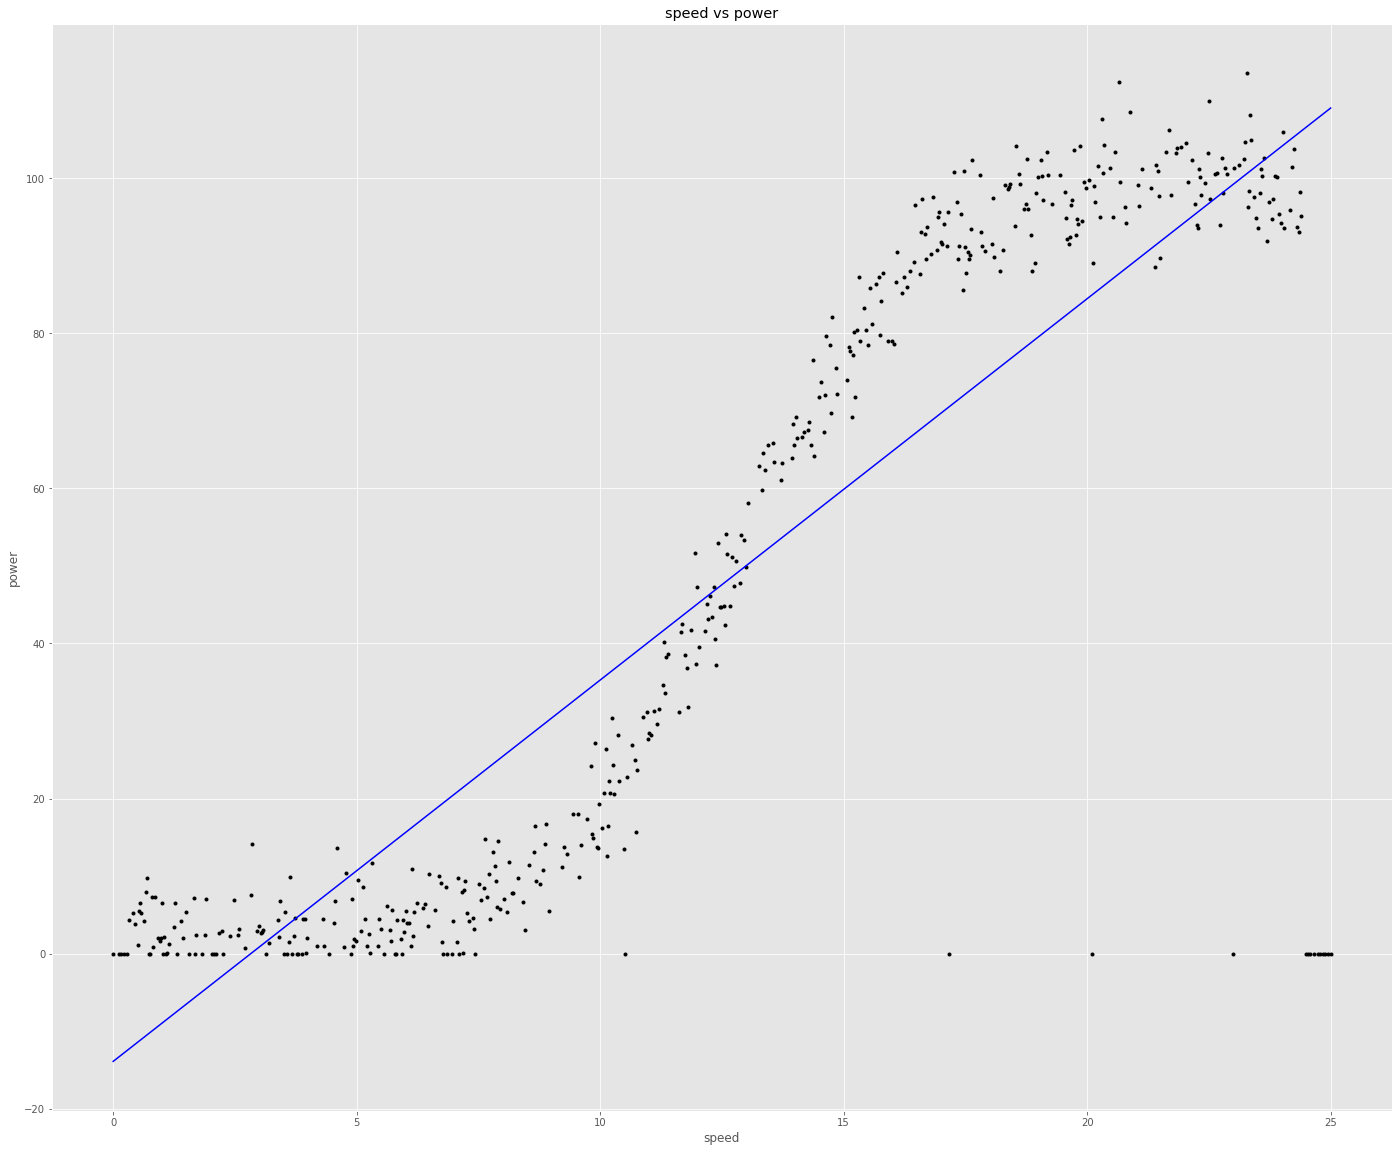

In [12]:
plt.plot(df['speed'],df['power'],'.',color='black')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed,coeffs[0] *speed + coeffs[1],color='blue',label = 'Best Fit line');

#### Discuss model

The R-dquared vaue of .728 is a pretty decent fit for the model. From observing the above plot it is very noticable that a straight line does not fit the shape of the data. The outliers for power when speed is greater than zero also effect the model accuaracy and score. 

In [13]:
print("The R-squared value is %6.4f" % rsq)
print("The Root Mean Squared error value is %6.4f" % rmse)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs[0],coeffs[1], cost1(coeffs[0],coeffs[1])))

The R-squared value is 0.7289
The Root Mean Squared error value is 21.6445
Cost with m =  4.92 and c = -13.90: 234241.16


### Simple Linear Regression with Numpy Polyfit removing zero values for power

In [14]:
df2 = df[df['power']!=0].reset_index()

In [15]:

#power and speed values as variable
power2 = df2['power']
speed2 = df2['speed']

#polyfit function, identifiying coeffieients
coeffs2= np.polyfit(speed2,power2,1)

In [16]:
def predict_m2(x):
    return coeffs2[0] *+ x + coeffs2[1]

In [17]:
#calculating R-squared value for the dataset
rsq2 = np.corrcoef(power2,speed2)[0][1]**2

rmse2 = np.sqrt((np.sum((predict_m2(speed2) - power2)**2))/len(power2))

cost2 = lambda m,c: np.sum([(power2[i] - coeffs2[0] * speed2[i] - coeffs2[1])**2 for i in range(speed2.size)])
c2 = cost2(coeffs2[0],coeffs2[1])

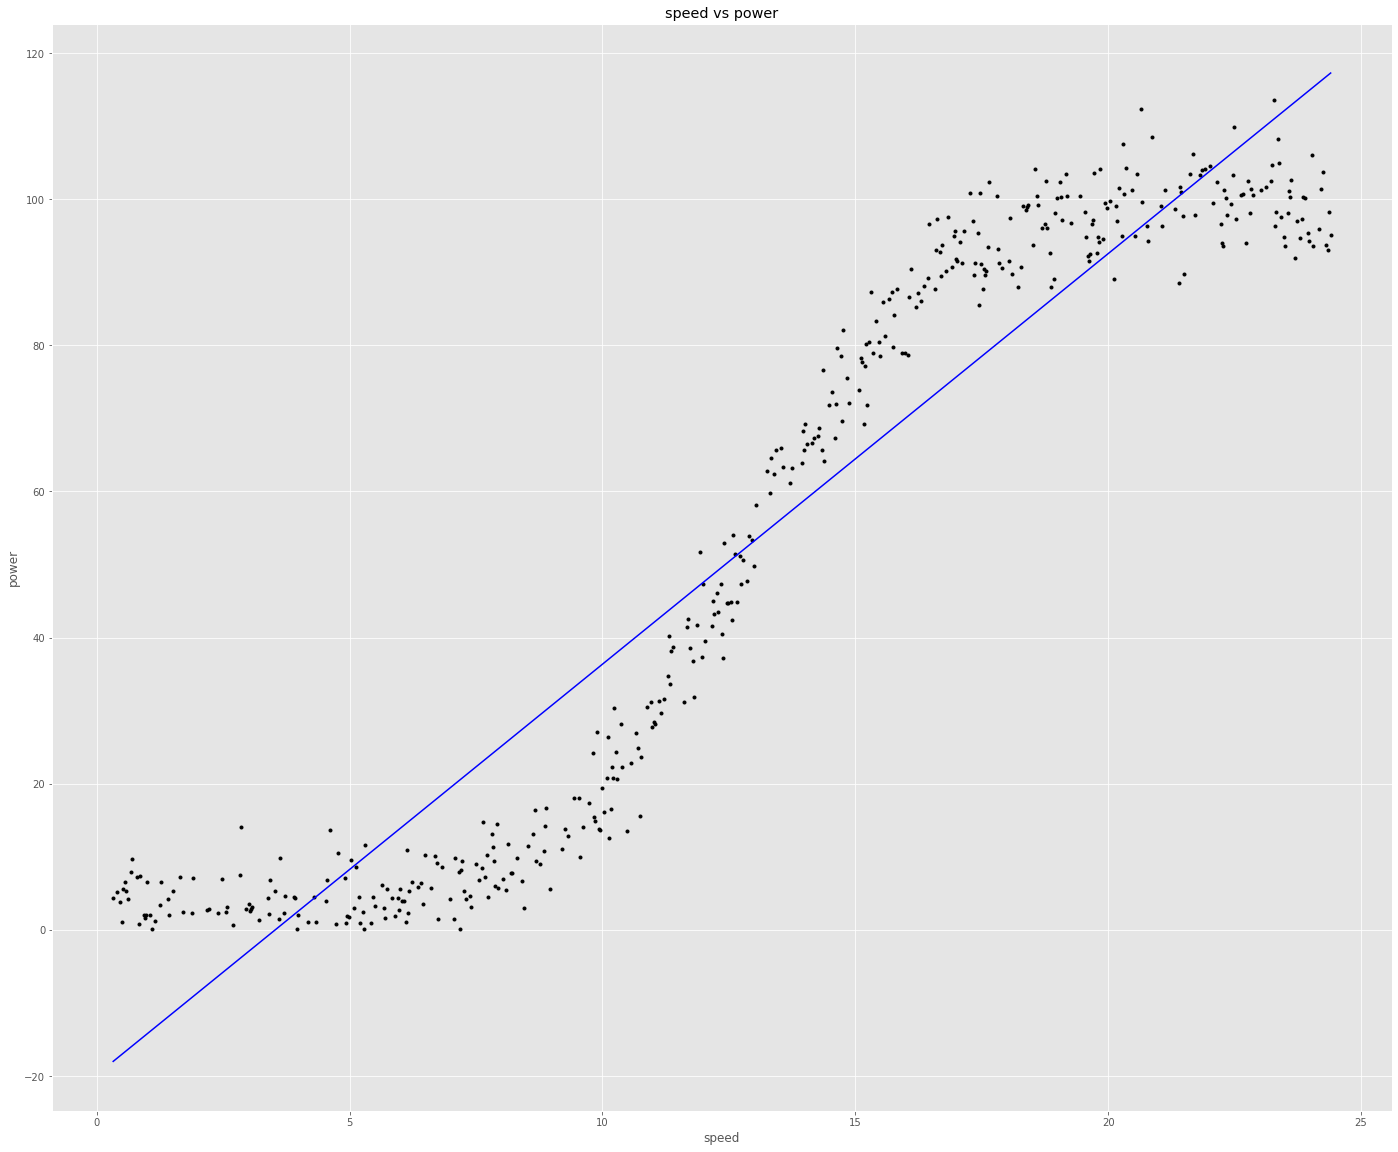

In [18]:
plt.plot(df2['speed'],df2['power'],'.',color='black')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(df2['speed'],coeffs2[0] *df2['speed'] + coeffs2[1],color='blue',label = 'Best Fit line');

In [19]:
print("The R-squared value is %6.4f" % rsq2)
print("The Root Mean Squared error value is %6.4f" % rmse2)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs2[0],coeffs2[1], cost2(coeffs2[0],coeffs2[1])))

The R-squared value is 0.8985
The Root Mean Squared error value is 12.8967
Cost with m =  5.62 and c = -19.84: 75012.39


#### Comparision Dataframe of models

We can compare the difference in the R-squared value and cost value between model 1 (all the data) and model 2 (zero values for power removed)

In [29]:
#ref https://stackoverflow.com/questions/16597265/appending-to-an-empty-dataframe-in-pandas
compare_df = pd.DataFrame(columns = ['R-squared', 'Cost','RMSE'])

In [30]:
compare_df = compare_df.append({'R-squared':rsq,'Cost':c1,'RMSE':rmse,'Model':'Polyfit Model 1: All Data'},ignore_index=True)
compare_df = compare_df.append({'R-squared':rsq2,'Cost':c2,'RMSE':rmse2,'Model':'Polyfit Model 2: Zeros Removed'},ignore_index=True)

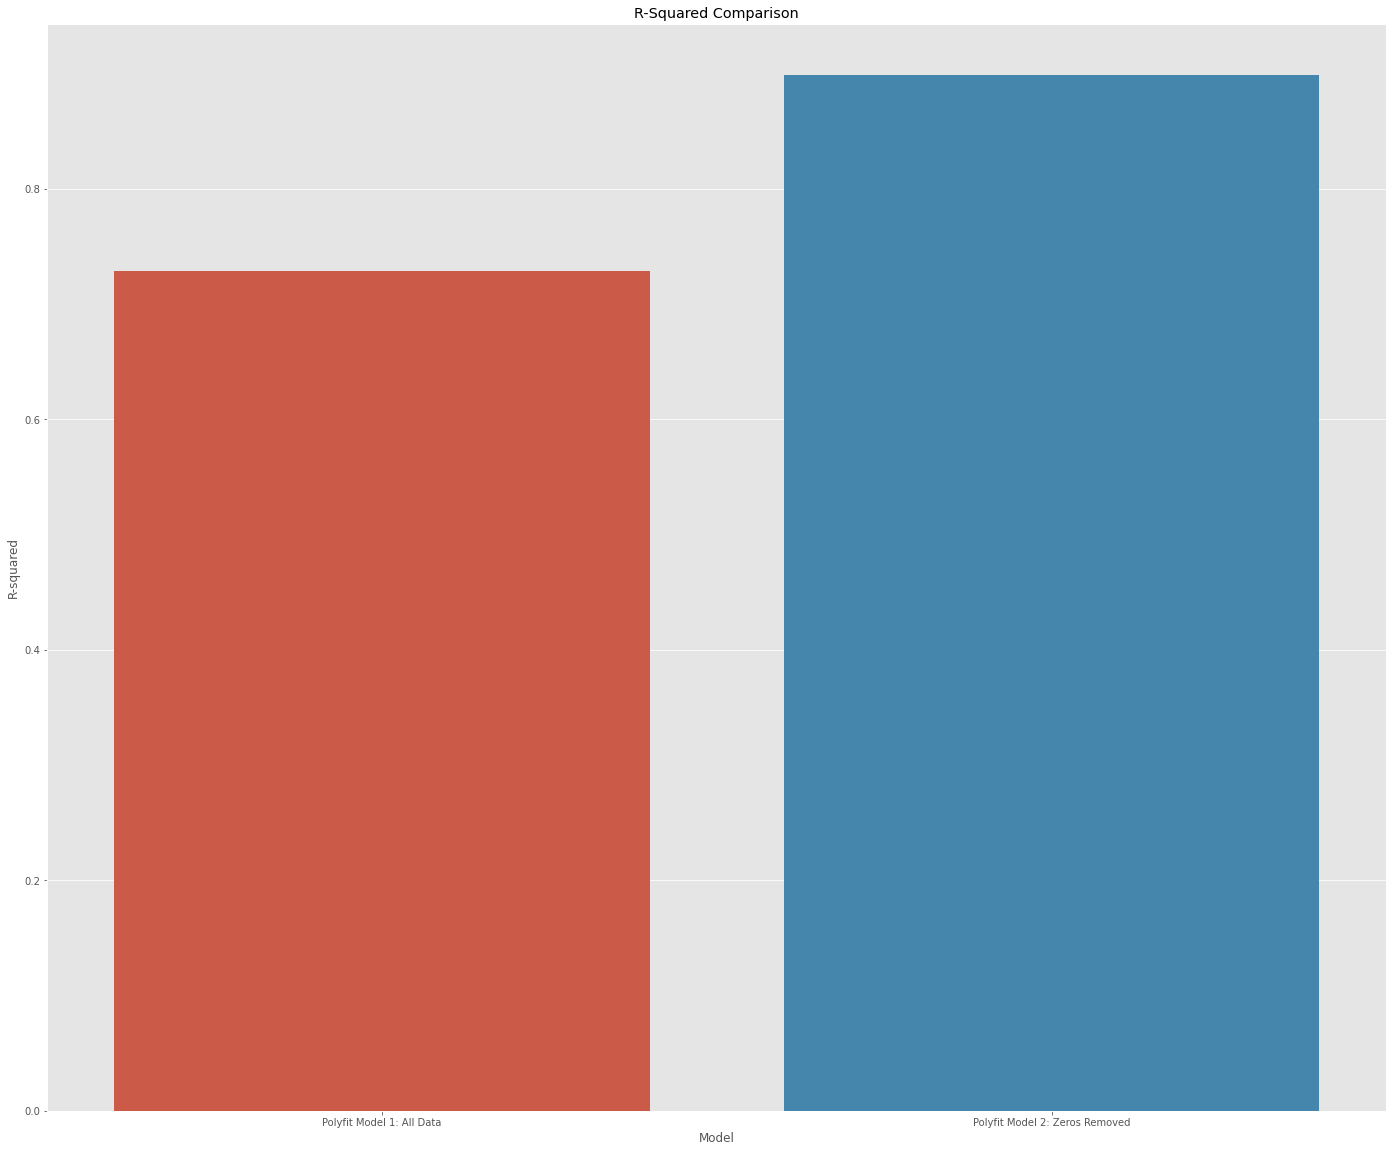

In [31]:
sns.barplot(x='Model',data=compare_df,y='R-squared')
plt.title('R-Squared Comparison');

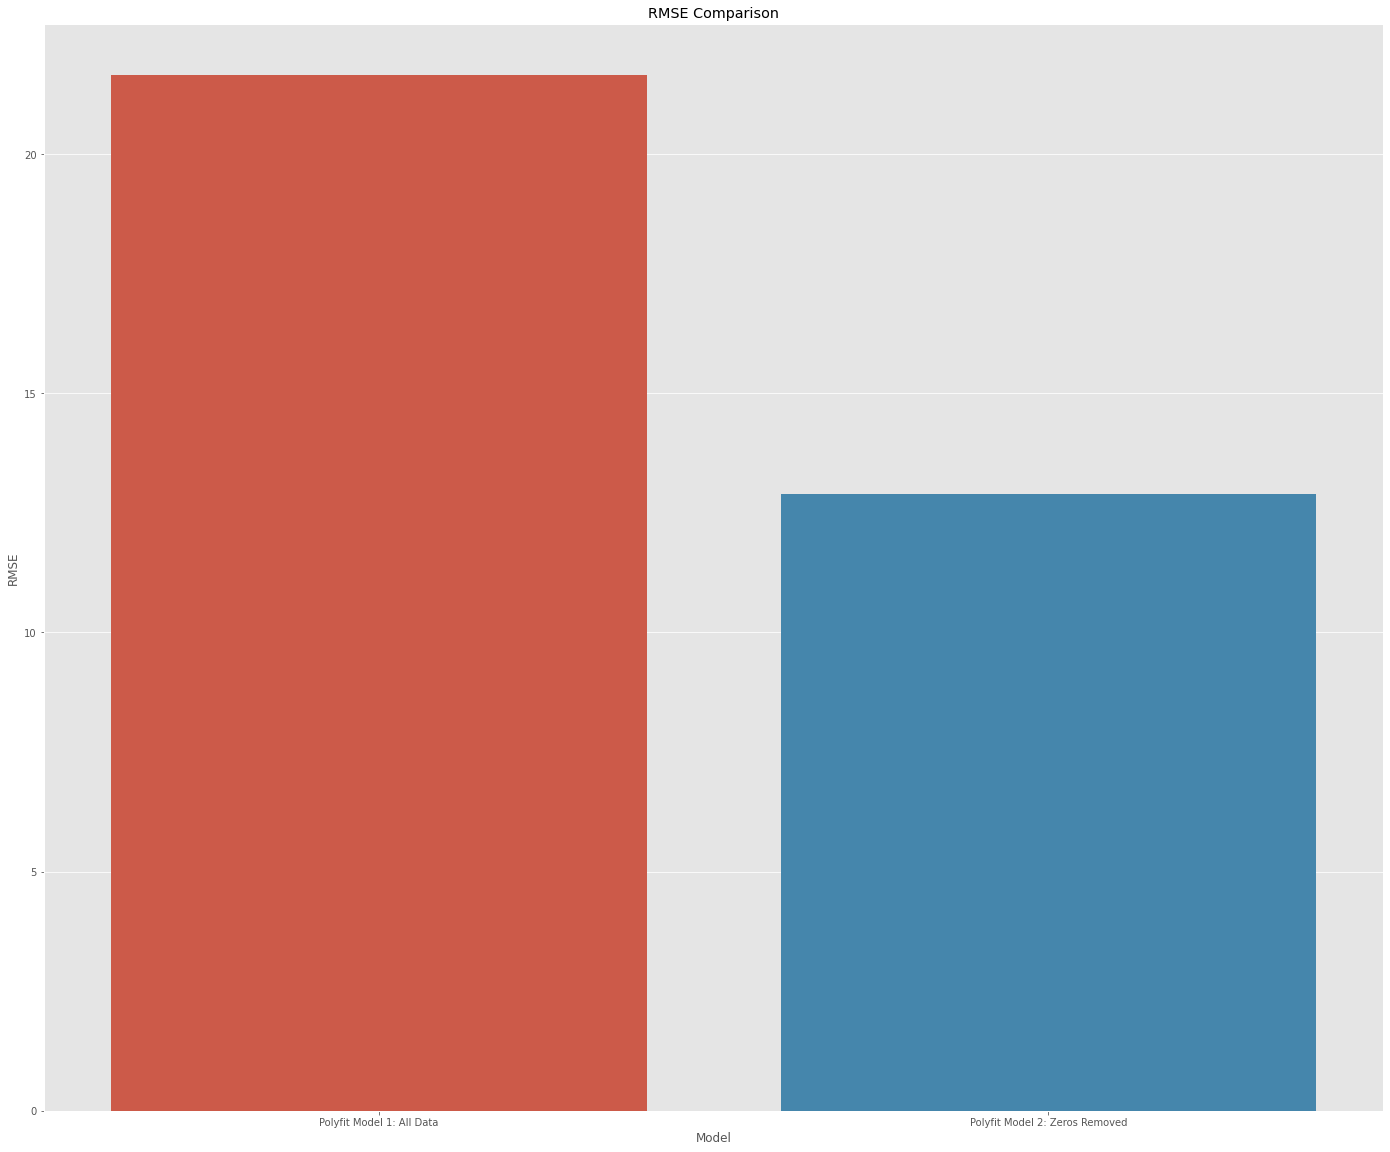

In [32]:
sns.barplot(x='Model',data=compare_df,y='RMSE')
plt.title('RMSE Comparison');

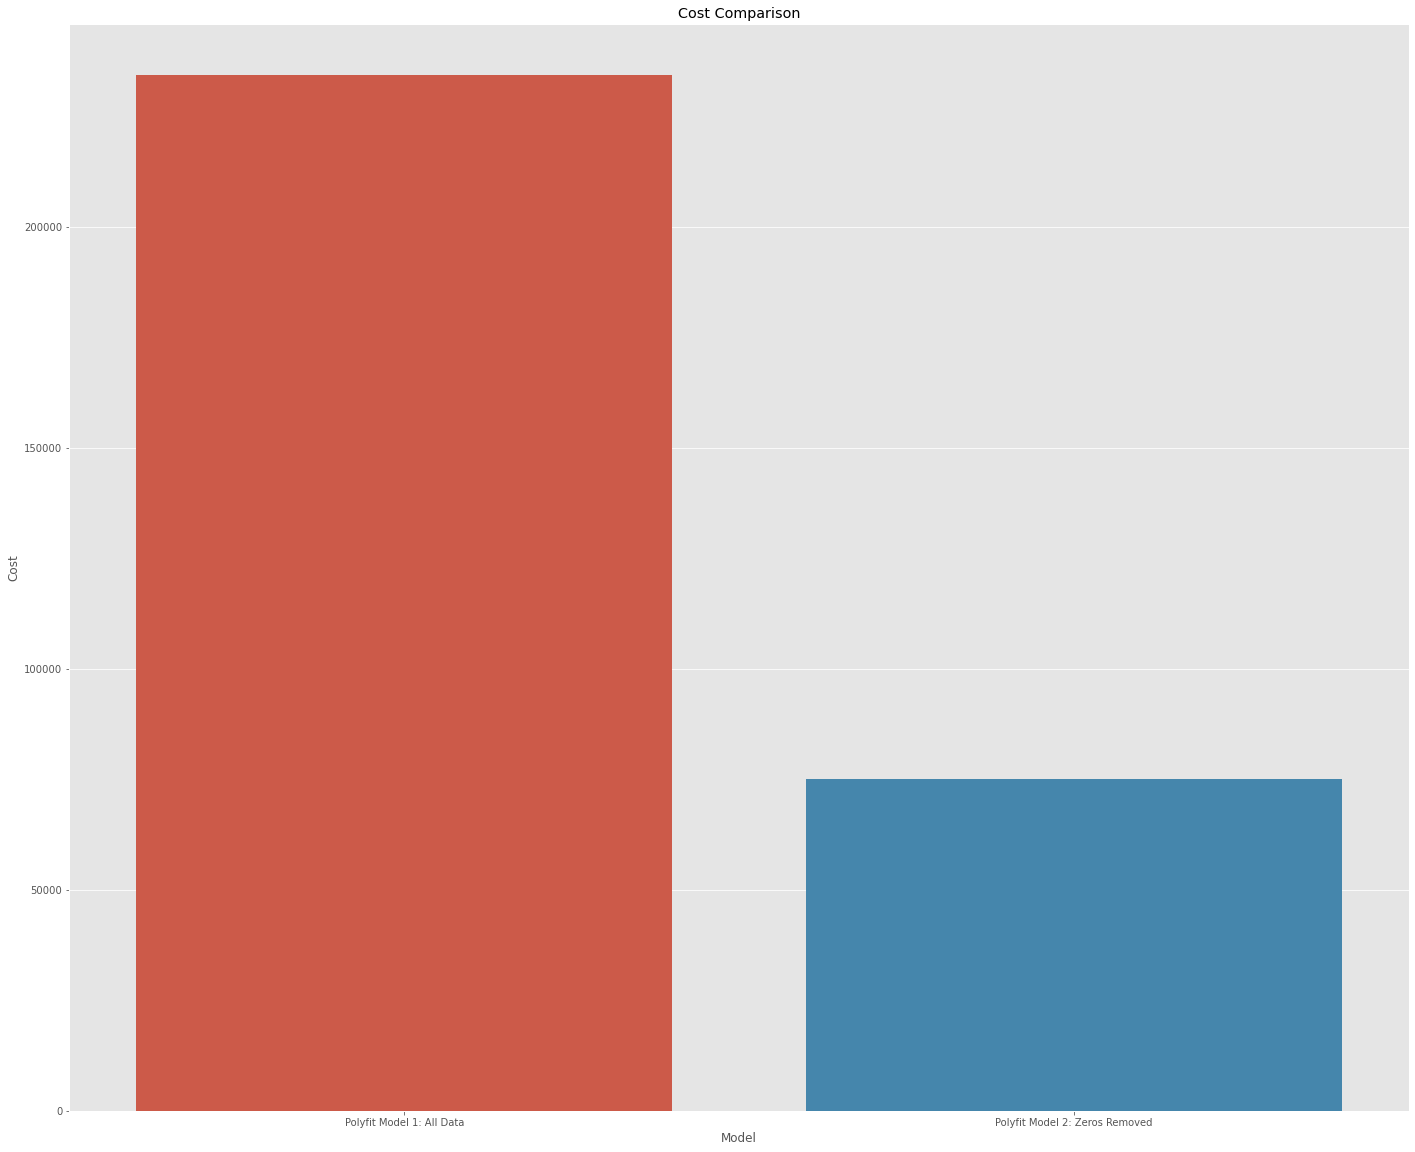

In [33]:
sns.barplot(x='Model',data=compare_df,y='Cost')
plt.title('Cost Comparison');

### Simple Linear Regression SK Learn

#### All data

In [52]:
import sklearn.linear_model as lin

x = speed.to_numpy()
y = power.to_numpy()

x = x.reshape(-1,1)


model = lin.LinearRegression()
model.fit(x, y)

rsq3 = model.score(x,y)
coeffs3 = [model.coef_[0],model.intercept_]

cost3 = lambda m,c: np.sum([(y[i] - coeffs3[0] * x[i] - coeffs3[1])**2 for i in range(y.size)])

In [53]:
print("The R-squared value is %6.4f" % rsq3)

The R-squared value is 0.7289


In [54]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs3[0],coeffs3[1], cost3(coeffs3[0],coeffs3[1])))
cost3 = cost3(coeffs3[1],coeffs3[0])

Cost with m =  4.92 and c = -13.90: 234241.16


In [55]:
def predict_m3(x):
    return coeffs3[0] *+ x + coeffs3[1]

#### Zero Values Removed

In [56]:
x2 = speed2.to_numpy()
y2 = power2.to_numpy()

x2 = x2.reshape(-1,1)


model = lin.LinearRegression()
model.fit(x2, y2)

rsq4 = model.score(x2,y2)
coeffs4 = [model.coef_[0],model.intercept_]

cost4 = lambda m,c: np.sum([(y2[i] - coeffs4[0] * x2[i] - coeffs4[1])**2 for i in range(y2.size)])

In [57]:
print("The R-squared value is %6.4f" % rsq4)

The R-squared value is 0.8985


In [49]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs4[0],coeffs4[1], cost4(coeffs4[0],coeffs4[1])))
cost4 = cost4(coeffs4[1],coeffs4[0])

Cost with m =  5.62 and c = -19.84: 75012.39


In [50]:
def predict_m4(x):
    return coeffs4[0] *+ x + coeffs4[1]

### Polynomial
Create a function to call multile poly degrees